# Analysis of electrophysiology data with Python

**NumPy** (Python library): creating and manipulating numerical data. NumPy provides a high-performance multidimensional array object, and tools for working with these arrays.\
**Matplotlib** (Python library) is a comprehensive library for creating static, animated, and interactive visualizations in Python. _"Matplotlib makes easy things easy and hard things possible."_ \
**Pandas** (Python library) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. \
References and detailed documentation can be found: https://numpy.org/doc/, https://matplotlib.org/stable/index.html, https://pandas.pydata.org/docs/.

In [60]:
# Import the python libraries to have all functions needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = pd.read_csv("Multiple_Evoked_AP.txt")
# Preview the first 5 lines of the loaded data 
data.head()

,Time,2 Imon-1,1 Vmon-1
0,0.0000,-1.81,-84.98
1,0.0001,-1.75,-85.10
2,0.0002,-1.78,-85.04
3,0.0003,-1.78,-85.07
4,0.0004,-1.81,-85.16


Text(0, 0.5, 'Membrane potential')

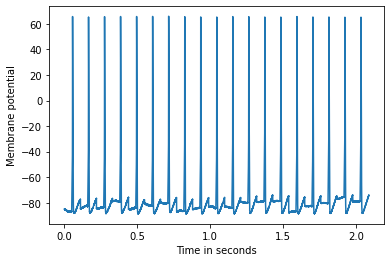

In [61]:
# Plot the membrane potential as a function of time
plt.plot(data.values[:,0],data.values[:,2])
plt.xlabel("Time in seconds")
plt.ylabel("Membrane potential")

Text(0, 0.5, 'Injected current')

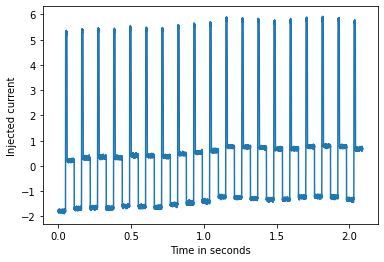

In [62]:
# Plot the injected current as a function of time
plt.plot(data.values[:,0],data.values[:,1])
plt.xlabel("Time in seconds")
plt.ylabel("Injected current")

In [64]:
print(np.min(abs(data.values[:,0]-0.14)))
print(np.argmin(abs(data.values[:,0]-0.14)))

0.0
1400


Text(0.5, 0, 'Timesteps')

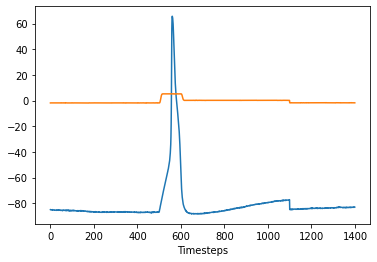

In [66]:
# Cut the first time/current/voltage motif and plot it
T=data.values[0:np.argmin(abs(data.values[:,0]-0.14)),0] #time array
I=data.values[0:np.argmin(abs(data.values[:,0]-0.14)),1] #current array 
V=data.values[0:np.argmin(abs(data.values[:,0]-0.14)),2] #membrane potential array
plt.plot(V)
plt.plot(I)
plt.xlabel("Timesteps")

506

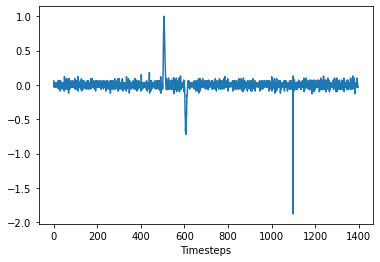

In [69]:
# Plot the differential of the injected current and find its max
plt.plot(np.diff(I))
plt.xlabel("Timesteps")
StartCurrent=np.argmax(np.diff(I))
StartCurrent

556

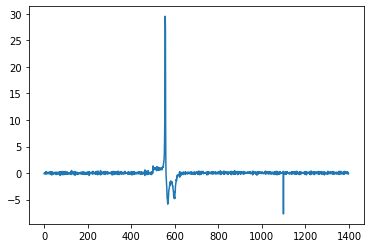

In [70]:
# Plot the differential of the membrane potential and find its max
plt.plot(np.diff(V))
StartAP=np.argmax(np.diff(V))
StartAP

In [71]:
# Get the latency of AP as the difference between current step initiation and maximal slope of membrane potential
latency=T[StartAP]-T[StartCurrent]
latency

0.0049999999999999975

In [72]:
np.shape(data.values)

(20900, 3)

In [73]:
# Find the length of a 'motif', which is repeated 19 times
l,n=np.shape(data.values)
l/19

1100.0

In [74]:
latencies = np.zeros(19)
for i in range(19):
    T=data.values[i*1100:(i+1)*1100,0]
    I=data.values[i*1100:(i+1)*1100,1]
    V=data.values[i*1100:(i+1)*1100,2]
    StartCurrent=np.argmax(np.diff(I))
    StartAP=np.argmax(np.diff(V))
    latencies[i]=T[StartAP]-T[StartCurrent]

latencies


array([0.005 , 0.0047, 0.0048, 0.0046, 0.0048, 0.0048, 0.005 , 0.0054,
       0.005 , 0.0052, 0.005 , 0.0049, 0.0049, 0.0051, 0.0056, 0.0053,
       0.0053, 0.005 , 0.0053])

In [75]:
# Loop on the motifs, to find the latency of AP in each motif
Nap=0; latencies=np.zeros(shape=(19,1)) #Nap is number of action potentials
for i in range(0,20900,1100):
    T=data.values[i:i+1100,0]
    I=data.values[i:i+1100,1]
    V=data.values[i:i+1100,2]
    StartCurrent=np.argmax(np.diff(I))
    StartAP=np.argmax(np.diff(V))
    latencies[Nap]=T[StartAP]-T[StartCurrent]
    Nap=Nap+1

#Print the latencies, their mean and standard deviation
print(latencies)
print(np.mean(latencies))
print(np.std(latencies))

[[0.005 ]
 [0.0047]
 [0.0048]
 [0.0046]
 [0.0048]
 [0.0048]
 [0.005 ]
 [0.0054]
 [0.005 ]
 [0.0052]
 [0.005 ]
 [0.0049]
 [0.0049]
 [0.0051]
 [0.0056]
 [0.0053]
 [0.0053]
 [0.005 ]
 [0.0053]]
0.005036842105263139
0.0002517528577494869


In [77]:
data.values[:,2].shape

(20900,)

In [78]:
V=np.reshape(data.values[:,2],(19,1100));
V.shape

(19, 1100)

In [79]:
V_T = np.transpose(V)
V_T.shape

(1100, 19)

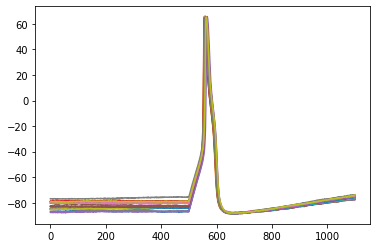

In [80]:
plt.plot(np.transpose(V))

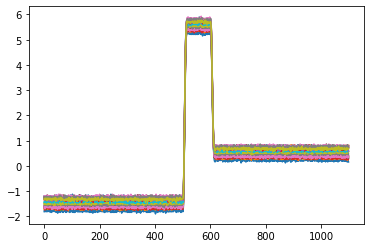

In [81]:
I=np.reshape(data.values[:,1],(19,1100));
plt.plot(np.transpose(I))

In [99]:
np.argmax(np.diff(I, axis = 1))


array([[ 0.06, -0.03,  0.  , ...,  0.  , -0.03, -0.03],
       [ 0.13, -0.1 , -0.03, ..., -0.03,  0.03, -0.06],
       [ 0.03, -0.07,  0.07, ...,  0.1 , -0.07, -0.03],
       ...,
       [-0.03,  0.  ,  0.03, ...,  0.  ,  0.  ,  0.  ],
       [-0.06,  0.03,  0.  , ..., -0.03,  0.03,  0.  ],
       [ 0.  , -0.03,  0.06, ...,  0.  ,  0.03,  0.  ]])

In [104]:
StartCurrent=np.argmax(np.diff(I,axis=1),axis=1) #columns
StartCurrent

array([506, 506, 505, 506, 506, 506, 505, 505, 506, 506, 507, 506, 506,
       506, 506, 507, 506, 506, 506])

In [105]:
StartAP=np.argmax(np.diff(V,axis=1),axis=1)
StartAP

array([556, 553, 553, 552, 554, 554, 555, 559, 556, 558, 557, 555, 555,
       557, 562, 560, 559, 556, 559])

In [106]:
latency=(StartAP-StartCurrent)*0.0001
print(latency)
print(np.mean(latency))
print(np.std(latency))


[0.005  0.0047 0.0048 0.0046 0.0048 0.0048 0.005  0.0054 0.005  0.0052
 0.005  0.0049 0.0049 0.0051 0.0056 0.0053 0.0053 0.005  0.0053]
0.005036842105263158
0.00025175285774950315


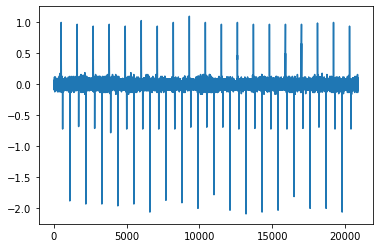

In [100]:
# Plot the differential of the whole membrane potential trace
plt.plot(np.diff(data.values[:,1]))

In [88]:
#Alternative method for latency caculation:
# In the whole traces, find when the current slope is >0.5 and when the slope of membrane potential is >15
# Then consider only the times separated by more than 1ms (to only consider the first value above threshold in the continuous trace)
# And calculate all frequencies over the given vectors
x=np.array([0])
HighSlopeTimes=data.values[np.block([np.diff(data.values[:,2]),x])>15,0]
TimeDiff=np.diff(HighSlopeTimes)
StartAP=HighSlopeTimes[np.block([TimeDiff,x])>0.001]

HighSlopeCurrentTimes=data.values[np.block([np.diff(data.values[:,1]),x])>0.5,0]
TimeDiff=np.diff(HighSlopeCurrentTimes)
StartCurrent=HighSlopeCurrentTimes[np.block([TimeDiff,x])>0.001]

print(StartAP-StartCurrent)
print(np.mean(StartAP-StartCurrent))
print(np.std(StartAP-StartCurrent))

[0.0048 0.0044 0.0045 0.0044 0.0045 0.0046 0.0046 0.0051 0.0048 0.005
 0.0048 0.0047 0.0047 0.0049 0.0054 0.0051 0.0049 0.0047]
0.004772222222222229
0.0002577801724026757
